# Cluster-Based Segmentation

The cluster-based implementation generates clusters in agreement with similarities. For this method, the most famous algorithm is the k-means clustering algorithm. In contrast to region-based segmentation, the regions in cluster-based segmentation are determined by an algorithm, not manually.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

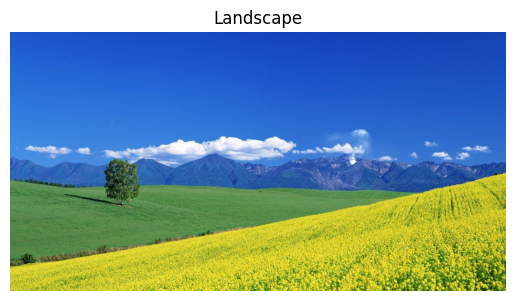

In [3]:
image = cv2.imread('images/landscape_02.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.title('Landscape')
plt.axis('off')

plt.show()

In [8]:
HEIGHT, WIDTH = image.shape[0], image.shape[1]

print(f'Image height: {HEIGHT} px')
print(f'Image width: {WIDTH} px')

Image height: 418 px
Image width: 800 px


In [10]:
vectorized_image = image.reshape(-1, 3)
vectorized_image = np.float32(vectorized_image)

print(f'Image shape: {vectorized_image.shape}')

Image shape: (334400, 3)


In [11]:
CRITERIA = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

In [20]:
# ret: Sum of the squared distance from each point to its centers.
# labels: The labels of each pixel in the image.
# centers: Array with the centroids.
ret, label, centers = cv2.kmeans(vectorized_image, 3, None, CRITERIA, 10, cv2.KMEANS_RANDOM_CENTERS)

In [22]:
len(label), len(centers)

(334400, 3)

In [24]:
print(centers)

[[ 91.90228  132.78923   59.793518]
 [203.16287  203.30933   62.561638]
 [ 42.27947  100.01198  199.89627 ]]


In [27]:
centers = np.uint8(centers)

print(centers)


[[ 91 132  59]
 [203 203  62]
 [ 42 100 199]]


In [30]:
final_image = centers[label.flatten()]
final_image = final_image.reshape(image.shape)

In [31]:
final_image.shape

(418, 800, 3)

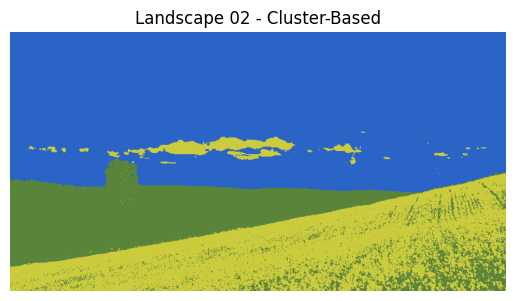

In [32]:
plt.imshow(final_image, cmap='gray')
plt.title('Landscape 02 - Cluster-Based')
plt.axis('off')

plt.show()